# Preparation of a FEMTIC inversion input files: data and mesh 

Example with the AusLAMP South Australia Dataset

In [1]:
import sys
sys.path.append('../../src')
import femticPy

# 1. Prepare inversion data file

In [2]:
# the file will be written in the input_data directory
inversion = femticPy.DataGen(survey = 'auslamp', outdir = './inversion')

In [3]:
# Loading the data and the data coordinates
inversion.read_MTdata('./input_data/edi_files/')
inversion.read_MTdata_coordinates('./input_data', 'coord_auslampSA')

Read 109 .edi files


/Users/sei029/Documents/projects/strategic_FEMTIC/repo_github/femticpy/src/femticPy.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Z.drop(masked, inplace=True)
/Users/sei029/Documents/projects/strategic_FEMTIC/repo_github/femticpy/src/femticPy.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_VTF.drop(masked, inplace=True)
/Users/sei029/Documents/projects/strategic_FEMTIC/repo_github/femticpy/src/femticPy.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [4]:
## Data to be inverted for
inversion.invert_Z   = True
inversion.invert_VTF = False
inversion.invert_PT  = False

In [5]:
# load the 3 files needed to create the mesh
inversion.topography = './input_data/topography.dat'
inversion.bathymetry = './input_data/bathymetry.dat'
inversion.coast_line = './input_data/coast_line.dat'

In [6]:
# we center the data to a anchor point (center of the data set) which will also be the center of the future mesh
inversion.center_data()
inversion.anchor

[6190.4220000000005, 715.3695]

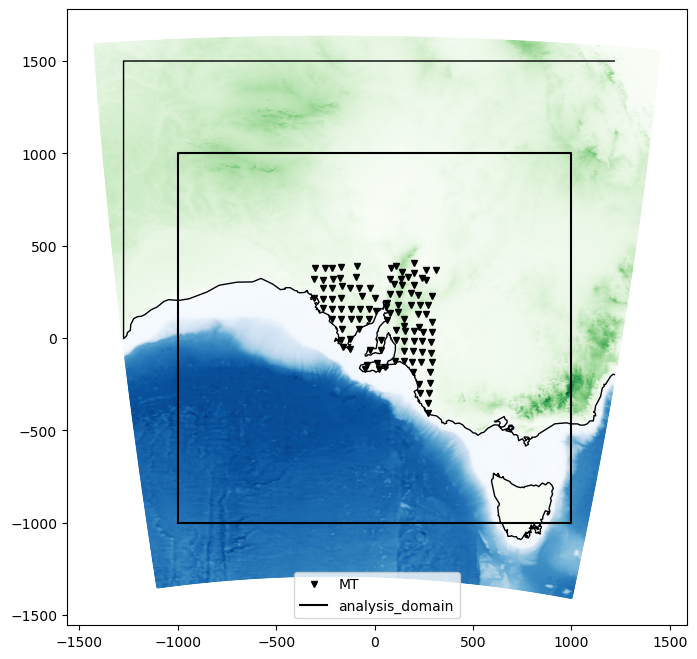

In [7]:
# we define the analysis domain, the extent of the total mesh including padding
inversion.analysis_domain = [[-1000.0, 1000.0],
                                [-1000.0, 1000.0],
                                [-1000.0, 1000.0]]
inversion.plot_data_loc(plot_ids = False, zoom_core=False)
inversion.plot_coast_line()
inversion.plot_topo_bathy()

In [8]:
inversion.mt_coords

,id,east,north,z
0,EP001,-125.0065,-60.690,0.112880
1,EP002,-159.6985,-47.571,0.048853
2,EP003,34.6885,-63.469,0.028520
3,EP004,-24.3015,-67.285,0.032904
4,EP005,54.4945,-154.690,0.146430
...,...,...,...,...
105,SA203,6.4365,143.750,0.075474
106,SA204,0.7905,219.054,0.127897
107,SA400,-310.0345,216.566,0.005000
108,SA401,-263.0525,212.944,0.045561


In [9]:
inversion.data_Z

[        FREQ     ZXXR     ZXXI   ZXX.VAR     ZXYR     ZXYI   ZXY.VAR  \
 0   0.031250 -2.88660 -1.76620  0.000338  5.24060  2.63040  0.000262   
 1   0.023438 -2.75170 -1.56210  0.000403  4.86090  2.42360  0.000282   
 2   0.015625 -2.46840 -1.43610  0.000203  4.31540  2.09250  0.000133   
 3   0.011719 -2.26400 -1.34720  0.000242  3.99820  1.90440  0.000159   
 4   0.007813 -1.93440 -1.24330  0.000150  3.59310  1.63660  0.000106   
 5   0.005859 -1.69930 -1.16370  0.000201  3.34810  1.49860  0.000150   
 6   0.003906 -1.39820 -1.02680  0.000143  3.04100  1.34180  0.000103   
 7   0.002930 -1.21430 -0.93647  0.000177  2.85990  1.27790  0.000136   
 8   0.001953 -0.97433 -0.80631  0.000130  2.55410  1.18750  0.000116   
 9   0.001465 -0.86063 -0.71616  0.000245  2.35620  1.13750  0.000254   
 10  0.000977 -0.69959 -0.55458  0.000140  2.06350  1.09750  0.000169   
 11  0.000732 -0.62191 -0.51163  0.000268  1.86540  1.07770  0.000224   
 12  0.000488 -0.55794 -0.38851  0.000257  1.60160 

In [10]:
# Set up error floors
# x% of (srqt(Zxy^2 + Zyx^2))
inversion.error_floor_Z = [0.2, 0.05, 0.05, 0.2]  # [Zxx, Zxy, Zyx, Zyy]

In [11]:
subsampling = 2
inversion.freqs[::subsampling]

array([3.125000e-02, 1.562500e-02, 7.812501e-03, 3.906200e-03,
       1.953100e-03, 9.765599e-04, 4.882800e-04, 2.441401e-04,
       1.220700e-04, 6.103497e-05])

Inversion data summary: 

  Inverting for 9 frequencies


  Impedance Z: 

  109 MT sites

  7592 Impedance tensor data points (full Z tensor, Real and Imag data) 

  Data points per frequencies: 

    T = 8.192E+03s  nData =  89 

    T = 4.096E+03s  nData = 106 

    T = 2.048E+03s  nData = 108 

    T = 1.024E+03s  nData = 108 

    T = 5.120E+02s  nData = 109 

    T = 2.560E+02s  nData = 108 

    T = 1.280E+02s  nData = 108 

    T = 6.400E+01s  nData = 108 

    T = 3.200E+01s  nData = 105 



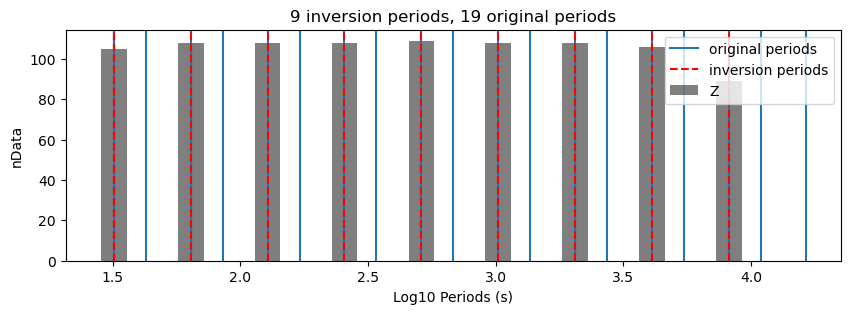

In [12]:
inversion.write_observe(write = True, freq_bandwidth = [0.0001,150], subsampling = subsampling)

# 2. Prepare inversion control file

In [13]:
# Define inversion parameters:

#TRADE_OFF_PARAM
TRADE_OFF_PARAM = [3]

# Max number of iterations
ITERATION = 10

# NUM_THREADS
NUM_THREADS = 4

# CONVERGE
CONVERGE = 0.2

# output directory
outdir = 'inversion'

In [14]:
inversion.write_inversion_control(TRADE_OFF_PARAM = TRADE_OFF_PARAM,
                                    ITERATION = ITERATION,
                                    NUM_THREADS = NUM_THREADS,
                                    CONVERGE = CONVERGE)

# 3. Prepare mesh files

In [15]:
# output directory
outdir = 'meshGen/files'

In [16]:
# create meshGen object
mesh01 = femticPy.MeshGen(inversion.survey,
                         inversion.analysis_domain, 
                         inversion.center, 
                         inversion.mt_coords,
                         inversion.nRx_Z,
                         outdir)

In [17]:
mesh01.sea = True
mesh01.sea

True

In [18]:
# Step 1: 

# Define the mesh disretization, sphere centered on the mesh center 
    # core area: 650km sphere radius (isotropic) / max cell size : 50km (anisotropic in z)
    # padding: 2000km sphere radius (isotropic), max cell size: 500km (isotropic)

mesh01.center = [0.0, 0.0, 0.0]
mesh01.rotation = -45
mesh01.ellipsoids_control = [2,
                     [650.0, 50.0, 0.35, 0.0, 0.0],
                     [2000.0, 500.0, 0.0, 0.0, 0.0]]

mesh01.coast_line = './input_data/coast_line.dat'

mesh01.ellipsoids_observing_sites =  [6, 
                                      1.0, 0.5,
                                      5.0, 1.0,
                                     50.0, 15.0,
                                      100.0, 25.0,
                                      150.0,50.0,
                                     200.0, 100.0]

In [19]:
# Step 6: Refine
# this step refines the tetras around the MT sites

mesh01.ellipsoids_obs_sites = [4,
                    [1.0, 0.5, 0.0] ,          
                    [10.0, 5.0, 0.0] ,           
                    [100.0, 25.0, 0.0],         
                    [200.0, 100.0, 0.0],]


mesh01.ellipsoids_mtr = [2,
                    [400.0, 50.0, 0.0, 0.1, 0.1],
                    [2000.0, 500.0, 0.0, 0.0, 0.0]]

In [20]:
# Step 7: Write mesh to FEMTIC format
# the attr file will determine how tetras will be combined to do elememnts (model parameters)

mesh01.ellipsoids_resistivity_attr = [2,
                    [400.0,       50.0,  0.0,  0.0],
                    [2000.0,  500.0,  0.0,  0.0]] 


mesh01.ellipsoids_resistivity_attr_sites = [3,                        
                    [10.0, 2.0],
                    [50.0, 10.0],
                    [150.0, 25.0]]

In [21]:
# Define the starting model resistivities (in ohm.m)
mesh01.resistivity_starting_model = 100

In [22]:
mesh01.write_inputs()

In [23]:
# number of regions (air, land, sea) 
mesh01.region_attributes

3

# 4. Run `create_mesh.sh`

the `create_mesh.sh` script call the `meshGen.sh` pipeline, that sequentially runs all the steps required to create the mesh. Depending on the size of the mesh this can take long (~ 10 min). 

"Step 4" in `meshGen.sh` needs to be modified to your problem:

```
#-----------------------"
#-----   STEP 4    -----"
#-----------------------"

echo "STEP 4... "
/scratch3/sei029/femtic/makeTetraMesh -stp 4
sed -i "$(( $(wc -l < output.poly) ))s/.*/3/" output.poly
echo "1   0.0 0.0 -40.0  10 1e9" >> output.poly
echo "2  -500.0 -500.0  1.0  20 1e9" >> output.poly
echo "3   0.0 0.0  40.0  30 1e9" >> output.poly
echo "   done!"
sleep 1
```

In this step, 3 lines are added to the `output.poly` file. They correspond to:

`"region_attribute   x   y   z   region_number   1e9"`

x, y, z (in km) should indicate at which location a sample of each region can be found. z is positive downwards.

The region numbers have to match with the ones in `resistivity_attr.dat`

```
3
10 1.0e+9 -1 1
20 0.250  -1 1
30 100.0   9 0
```

10 is for air, 20 for sea and 30 for earth (with associated resistivities)

"Step 5" in `meshGen.sh` calls a python script that fixes a bug that has been appearing sometimes. This is a temporary fix while understanding why a new region number (31 or 32) sometimes appears during step 5. 

```
echo "fix output.1.ele if necessary... "
module load python
python fix_output1.py
sleep 1
echo "   done!"
```

To check the size of the mesh, check the `resistivity_block_iter0.dat` file. The first number is the number of elements, the second is te number of cells.

```
>head resistivity_block_iter0.dat 
   1453333    206736
         0         0
....
```

# 5. Visualise the mesh using paraview (before running the inversion)

Setting up the ellipsoids is cumbersome and takes some trials to obtain a mesh that looks ok, in terms of cells discretization and mesh size. 

If the shell script has run properly, the final files to be used for the inversion should be:
- resistivity_block_iter0.dat
- mesh.dat



The output files that can be copied over and are useful for visualization are:

- output.6.femtic.vtk
   - to check the model parameter discretization (the cells), use the blockSerial attribute of the .vtk file
- triangles_with_height.vtk
- coastLine_fine.vtk
- coastLine_rough.vtk

The last 3 files are in km, and a transform filter has to be applied in paraview to be visualized with `output.6.femtic.vtk` (which is m)

# 6. Running the inversion using `run_inversion.sh`